In [3]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

## Q1

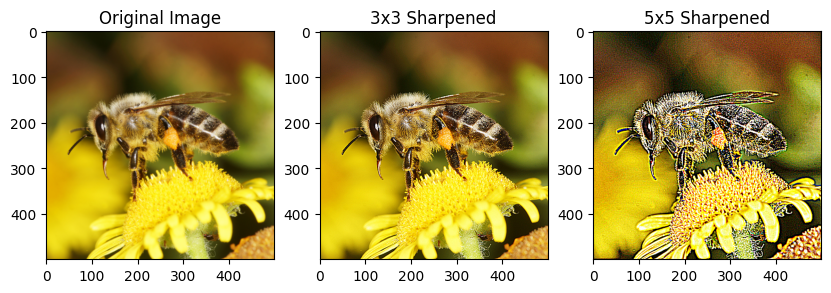

In [4]:
import matplotlib.pyplot as plt
image = cv.imread('images/native-bee.png')

# Define the kernels
kernel_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

kernel_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])


sharpened_3x3 = cv.filter2D(image, -1, kernel_3x3)
sharpened_5x5 = cv.filter2D(image, -1, kernel_5x5)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.title('Original Image'), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 2), plt.title('3x3 Sharpened'), plt.imshow(cv.cvtColor(sharpened_3x3, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 3), plt.title('5x5 Sharpened'), plt.imshow(cv.cvtColor(sharpened_5x5, cv.COLOR_BGR2RGB))
plt.show()

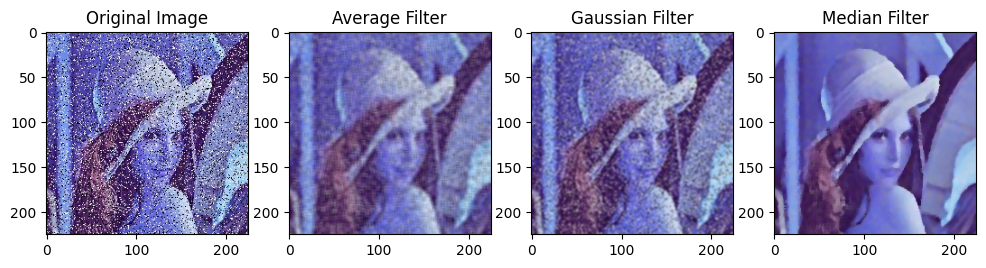

In [5]:
noise_image = cv.imread('images/noise_lena.jpg')


average_filter = cv.blur(noise_image, (5, 5))
gaussian_filter = cv.GaussianBlur(noise_image, (5, 5), 0)
median_filter = cv.medianBlur(noise_image, 5)


plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.title('Original Image'), plt.imshow(noise_image, cmap='gray')
plt.subplot(1, 4, 2), plt.title('Average Filter'), plt.imshow(average_filter, cmap='gray')
plt.subplot(1, 4, 3), plt.title('Gaussian Filter'), plt.imshow(gaussian_filter, cmap='gray')
plt.subplot(1, 4, 4), plt.title('Median Filter'), plt.imshow(median_filter, cmap='gray')
plt.show()

Median filter will be best, Gaussian Filter will be second clear while Average filter will be last.

In [ ]:
boat_image = cv.imread('images/boat.jpg')
gray_boat = cv.cvtColor(boat_image, cv.COLOR_BGR2GRAY)


_, thresh = cv.threshold(gray_boat, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the thresholded image if the black regions are to be highlighted
thresh = cv.bitwise_not(thresh)


contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


output_image = boat_image.copy()
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


cv.imshow('Original Image', boat_image)
cv.imshow('Thresholded Image', thresh)  
cv.imshow('Segmented Image', output_image)
cv.waitKey(0)
cv.destroyAllWindows()